## Group 3 Week 5

1. Consider the fixed-point iteration described by
    $$
    \begin{aligned}
    x_{n+1}= g( x_n)=\frac{1}{2}\left(x_n+\frac{a^2}{x_n}\right)\end{aligned}
    $$
    Show that the iteration converges to $a$ for any initial point $x_1 > 0$, and that the convergence is quadratic.

2. A particle of mass $m$ is bound within a 1-D square well of radius $a$
    $$
    V\left(  x\right)  =\begin{cases}
    -V_{0}, & \text{for }\left\vert x\right\vert \leq a,\\
    0, & \text{for }\left\vert x\right\vert \geq a
    \end{cases}
    $$
    Quantum Mechanics shows that the energies of the bound states $E<0$ are solutions of the transcendental equations
    $$
    \begin{aligned}
    \sqrt{10+E}\tan\left(  \sqrt{10+E}\right)    & =\sqrt{-E}\;\left(
    \text{even}\right)  \\
    \sqrt{10+E}\cot\left(  \sqrt{10+E}\right)    & =-\sqrt{-E}\;\left(  \text{odd}\right)\end{aligned}
    $$
    where even and odd refer to the symmetry of the wave function. Here we have chosen units such that $\hbar=1,$ $2m=1,$ $a=1$, and $V_{0}=10.$

    a) Find several bound-state energies for even wave function.

    b) See if making the potential deeper, say, by changing the 10 to a 20, or a 30, produces a larger number of, or deeper bound states. Also make the potential shallower, and see how the energies change. Please make a diagram of the ground state energy versus the depth of the potential.

3. Find the bond length of NaCl using the potential model discussed in the lecture, 
    $$
    V(r)=-\frac{e^2}{r}+V_0\exp(-r/r_0)
    $$
    Please use $e^2=14.4$ $\text{Å}\cdot eV$, $V_0=1.09\times 10^3 \text{ eV}$, $r_0=0.330\text{ Å}$. Write your own program and compare your result with the results from Python package `scipy.optimize`[^1]

4. Consider the nonlinear system 
    $$
    \begin{cases}
    2e^x+y=0\\
    3x^2+4y^2=8
    \end{cases}
    $$
    a) Locate the roots graphically.

    b) Based on the location of the roots, find the roots and compare your numerical results with the results from Python package `scipy.optimize`[^1]

    [^1]: (https://docs.scipy.org/doc/scipy/reference/optimize.html).

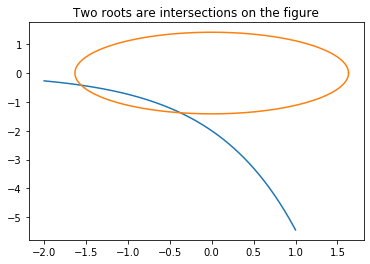

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sympy import symbols, diff, exp
from scipy.optimize import minimize
# a) =======================================================
x1 = np.linspace(-2, 1, 201)
y1 = -2 * np.exp(x1)

theta = np.linspace(0, 2*np.pi, 200)
x2 = np.cos(theta) * np.sqrt(8/3)
y2 = np.sin(theta) * np.sqrt(2)

plt.figure()
plt.plot(x1, y1, label='curve 1')
plt.plot(x2, y2, label='curve 2')
plt.title("Two roots are intersections on the figure")
plt.show()
plt.close()

In [3]:
# b) ===============================================
def NewtonMethod(F, J, x, precision=1e-2, max_rd=100, learning_rate=0.001, show_fig=False):
    F_value = F(x)
    F_norm = np.linalg.norm(F_value, ord=2) 
    rd = 0

    if show_fig:
        plt.figure()
        plt_x = []
        plt_y = []

    while abs(F_norm) > precision:
        delta = np.linalg.solve(J(x), F_value) 
        x -= delta * learning_rate
        F_value = F(x)
        F_norm = np.linalg.norm(F_value, ord=2)
        rd += 1
        if show_fig:
            plt_x.append(x[0])
            plt_y.append(x[1])

        if rd > max_rd:
            print(f"Method failed in {rd:d} steps.")
            if show_fig:
                plt.scatter(plt_x, plt_y)
                plt.show()
                plt.close()
            return [None, rd]
    if show_fig:
        plt.scatter(plt_x, plt_y)
        plt.show()
        plt.close()
    return x, rd

sym_x, sym_y = symbols("sym_x sym_y")
F0 = 2 * exp(sym_x) + sym_y
F1 = 3 * sym_x**2 + 4 * sym_y**2 - 8

print(diff(F0, sym_x))
print(diff(F0, sym_y))
print(diff(F1, sym_x))
print(diff(F1, sym_y))

2*exp(sym_x)
1
6*sym_x
8*sym_y


In [10]:
def F(arr):
    x, y = arr
    return np.array([2 * np.exp(x) + y,
        2 * x**2 + 4 * y**2 - 8])
def J(arr):
    x, y = arr
    return np.array([[2 * np.exp(x), 1],
        [6 * x, 8 * y]])
def F_target(arr):
    return np.linalg.norm(F(arr), ord=2)

root1, _ = NewtonMethod(F, J, [-2, -2*np.exp(-2)], show_fig=False, max_rd=100, learning_rate=1, precision=1e-7)
root2, _ = NewtonMethod(F, J, [0, -2], show_fig=False, max_rd=100, learning_rate=1, precision=1e-7)
print("solve by Newton method: ")
print("\troot1: ", root1, "\n\troot2: ",  root2)

root1 = minimize(F_target, [-2, -2*np.exp(-2)])
root2 = minimize(F_target, [0, -2])
print("solve by scipy.optimize: ")
print("\troot1: ", root1['x'], "\n\troot2: ",  root2['x'])

solve by Newton method: 
	root1:  [-1.95990875 -0.28174255] 
	root2:  [-0.3633555  -1.39067839]
solve by scipy.optimize: 
	root1:  [-1.95990876 -0.28174252] 
	root2:  [-0.3633555  -1.39067839]


5. Consider a linear $2\times 2$ system (with unknowns $x_1$ and $x_2$) described by its augmented matrix 
    $$
    \begin{bmatrix}
    \left.\begin{matrix}\varepsilon & 1\\
    1 & 1
    \end{matrix}\right\vert
    \begin{matrix}
    2\\
    1
    \end{matrix}\end{bmatrix}
    $$
    where $\epsilon > 0$ is a very small constant.

    a) Solve by Gauss elimination without partial pivoting.

    b) Solve by Gauss elimination with partial pivoting. Compare the results and discuss their validity.



6. Solve the system of equations $Ax=b$ with a well-behaved matrix
    $$
    A_{ii}=n,\text{ }A_{i\neq j}=1
    $$
    by applying 

    a) LU decomposition, (Hint: You can use Python module `scipy.linalg.lu_solve`)

    b) Cholesky decomposition, (Hint: You can use Python module `numpy.linalg.cholesky`)

    The right-hand side is $b=A\begin{pmatrix}
    1\\
    2\\
    \vdots\\
    n
    \end{pmatrix}$, hence the exact solution is $x=\begin{pmatrix}
    1\\
    2\\
    \vdots\\
    n
    \end{pmatrix}$.



7. **Multiple linear regression** generalizes simple linear regression by allowing several predictor variables instead of just one.    
   We model the response $y=a_{0}+a_{1}x_{1}+\cdots+a_{p}x_{p}$. Now, we have a sequence of $n$ response values $y_{i}$, and a sequence of $n$ predictor vectors $(x_{i1},x_{i2},\cdots,x_{ip})$. The goal is to estimate the parameter vector $(a_{0},\cdots,a_{p})$ so as to minimize the sum of the squared errors.   
   In matrix notation, we have an overdetermined system of equations 
   $$
   \mathbf{y=X a}
   $$
   where
   $$
   \begin{pmatrix}
   y_{1}\\
   y_{2}\\
   \vdots\\
   \\
   \\
   y_{n}%
   \end{pmatrix}=\begin{pmatrix}
   1 & x_{11} & x_{12} & \cdots & x_{1p}\\
   1 & x_{21} & x_{22} & \cdots & x_{2p}\\
   \vdots & \vdots & \ddots &  & \vdots\\
   &  &  &  & \\
   1 &  &  &  & \\
   1 & x_{n1} & x_{n2} & \cdots & x_{np}%
   \end{pmatrix} \begin{pmatrix}
   a_{0}\\
   a_{1}\\
   \vdots\\
   \\
   a_{p}%
   \end{pmatrix}
   $$
   Our goal is to find a vector $\mathbf{a}$ that minimizes $\mathbf{Xa-y}$ . A numerically stable algorithm for computing $\mathbf{a}$ is to compute QR factorization $\mathbf{X=QR}$, then solve the triangular system $\mathbf{Ra=Q^{T}y}$ via back substitution.

   The expression $z = ax^{2} +bxy +cy^{2} +dx +ey +f$ is known as a **quadratic form**. The set of points $(x, y)$, where $z = 0$, is a conic section. It can be an ellipse, a parabola, or a hyperbola, depending on the sign of the discriminant $b^{2}-4ac$. Circles and lines are special cases. The equation $z
    = 0$ can be normalized by dividing the quadratic form by any nonzero coefficient. For example, if $f\neq0$, we can divide all the other coefficients by $f$ and obtain a quadratic form with the constant term equal to one.

    ​	A planet follows an elliptical orbit. Here are ten observations of its position in the $(x, y)$ plane:

    ```
    x = [1.02 .95 .87 .77 .67 .56 .44 .30 .16 .01];
    y = [0.39 .32 .27 .22 .18 .15 .13 .12 .13 .15];
    ```

    a) Determine the coefficients in the quadratic form that fits these data in the least squares sense by setting one of the coefficients equal to one and solving a 10-by-5 overdetermined system of linear equations for the other five coefficients. Plot the orbit with $x$ on the $x$-axis and $y$ on the $y$-axis. Superimpose the ten data points on the plot.

    b) This least squares problem is nearly rank deficient. To see what effect this has on the solution, perturb the data slightly by adding to each coordinate of each data point a random number uniformly distributed in the interval $[-.0005, .0005]$. Compute the new coefficients resulting from the perturbed data. Plot the new orbit on the same plot with the old orbit. Comment on your comparison of the sets of coefficients and the orbits.    
    (Hint:  You can use Python module `numpy.linalg.qr`)